In [76]:
import requests
import json
import matplotlib.pyplot as plt

# 1. Consultando informações de um CEP

In [49]:
meu_cep = 59140370
url = 'https://api.postmon.com.br/v1/cep/%s' % meu_cep

print(url)

https://api.postmon.com.br/v1/cep/59140370


In [50]:
response = requests.get(url)

print(response)

<Response [200]>


In [51]:
if response.status_code == 200:
    data = response.json()
else:
  print(f'Ocorreu um erro.\n Status code: {response.status_code}')

In [52]:
print(response.json())

{'bairro': 'Boa Esperança', 'cidade': 'Parnamirim', 'logradouro': 'Rua Odilon Braga', 'estado_info': {'area_km2': '52.811,110', 'codigo_ibge': '24', 'nome': 'Rio Grande do Norte'}, 'cep': '59140370', 'cidade_info': {'area_km2': '123,471', 'codigo_ibge': '2403251'}, 'estado': 'RN'}


# 2. Consultando informações do clima

In [ ]:
url = 'https://api.open-meteo.com/v1/forecast'
params = {'latitude': -5.79448,
          'longitude': -35.211,
          'hourly': 'temperature_2m',
          'timezone': 'America/Sao_Paulo'}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
else:
  print(f'Ocorreu um erro.\n Status code: {response.status_code}')

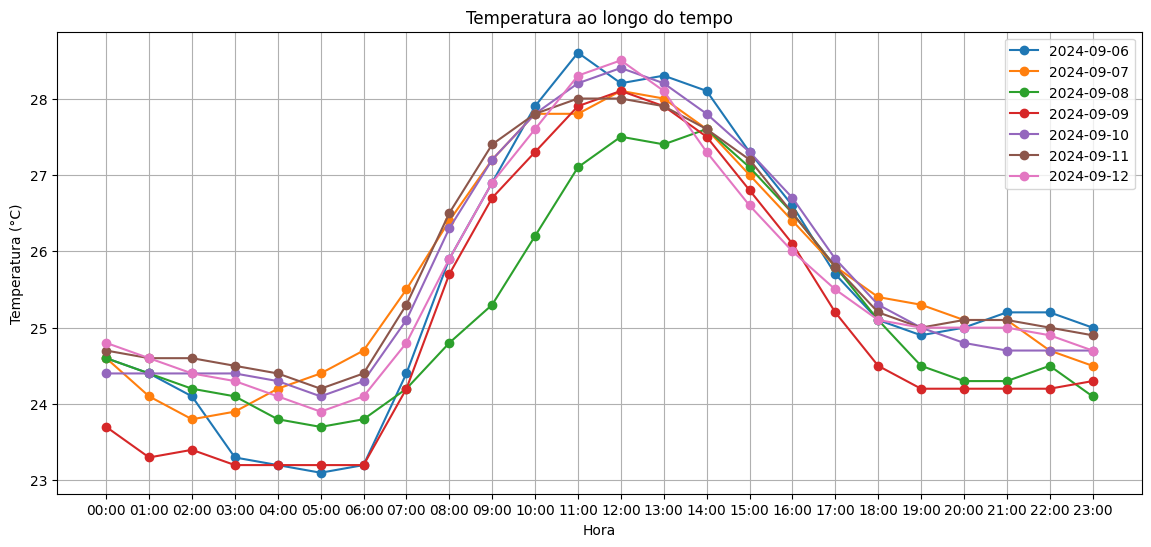

In [95]:
fig = plt.figure(figsize=(14, 6))
horarios = data['hourly']['time']

for i in range(0, len(horarios), 24):
  list_day_hour = list(map(lambda x: x.split('T'), horarios))[i:i+24]

  hours = [item[1] for item in list_day_hour]
  temp = data['hourly']['temperature_2m'][i:i+24]
  dia = list_day_hour[0][0]

  plt.plot(hours, temp, label=dia, marker='o')

plt.grid()
plt.xlabel('Hora')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura ao longo do tempo')
plt.legend()
plt.show()
